# The Mamography Machine Learning (MamML) Project
The aim of this project is to develop a rudimentary machine learning algorith that is able to diagnose malignant breast cancer from mamography scans.

## Step 1: Import the Data
First we need to import the data for the training, validation, and testing of the model. We start by importing the description of the mamography scans which are in the form of a CSV file. We are only interested in the binary diagnosis of Malignant or Benign (BENIGN_WITHOUT_CALLBACK will be included in the Benign diagnosis category)

In [2]:
import csv
import re
from pathlib import Path
import numpy as np

# The path to the description cvs file
Description_File = 'D:\IFN646\Mamography_Images\calc_case_description_test_set.csv'

# The path to the directory containing all Mamography images (Dont forget the double slash \\ at the end)
BaseDir = "D:\IFN646\Mamography_Images\CBIS-DDSM\\"

Diagnoses = []
File_Paths = []

with open(Description_File) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0

    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            Folder = re.findall(r'(.*)(_\d/)', row[13])[0][0] 
            for path in Path(BaseDir + Folder).rglob('*.dcm'):
                File_Path = str(path)
            File_Paths.append(File_Path)
            
            Diagnosis = row[9]
            if Diagnosis == 'BENIGN_WITHOUT_CALLBACK':
                Diagnosis = 'BENIGN'
            Diagnoses.append(Diagnosis)
            
            line_count += 1
            
    print(f'Processed {line_count} scans.')
    print()
    print("File Paths:")
    print(File_Paths)
    print()
    print("Diagnoses:")
    print(Diagnoses)

Processed 327 scans.

File Paths:
['D:\\IFN646\\Mamography_Images\\CBIS-DDSM\\Calc-Test_P_00038_LEFT_CC\\08-29-2017-DDSM-96009\\1.000000-full mammogram images-63992\\1-1.dcm', 'D:\\IFN646\\Mamography_Images\\CBIS-DDSM\\Calc-Test_P_00038_LEFT_MLO\\08-29-2017-DDSM-17613\\1.000000-full mammogram images-97934\\1-1.dcm', 'D:\\IFN646\\Mamography_Images\\CBIS-DDSM\\Calc-Test_P_00038_RIGHT_CC\\08-29-2017-DDSM-28468\\1.000000-full mammogram images-63304\\1-1.dcm', 'D:\\IFN646\\Mamography_Images\\CBIS-DDSM\\Calc-Test_P_00038_RIGHT_CC\\08-29-2017-DDSM-28468\\1.000000-full mammogram images-63304\\1-1.dcm', 'D:\\IFN646\\Mamography_Images\\CBIS-DDSM\\Calc-Test_P_00038_RIGHT_MLO\\08-29-2017-DDSM-85215\\1.000000-full mammogram images-08846\\1-1.dcm', 'D:\\IFN646\\Mamography_Images\\CBIS-DDSM\\Calc-Test_P_00038_RIGHT_MLO\\08-29-2017-DDSM-85215\\1.000000-full mammogram images-08846\\1-1.dcm', 'D:\\IFN646\\Mamography_Images\\CBIS-DDSM\\Calc-Test_P_00041_LEFT_CC\\08-29-2017-DDSM-52275\\1.000000-full mammo

Now we want to import the mamography images:

---------------------------------
Diagnosis: BENIGN


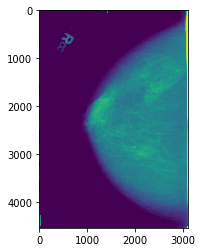

---------------------------------
Diagnosis: BENIGN


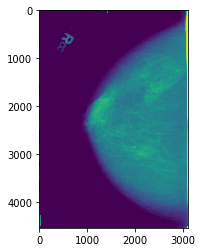

---------------------------------
Diagnosis: BENIGN


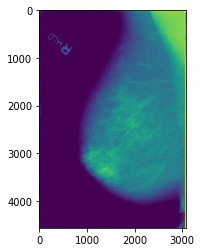

---------------------------------
Diagnosis: BENIGN


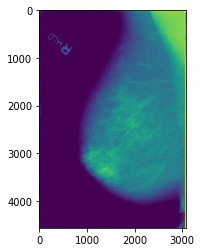

---------------------------------
Diagnosis: BENIGN


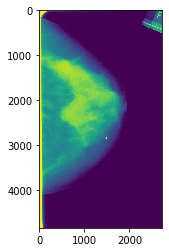

---------------------------------
Diagnosis: BENIGN


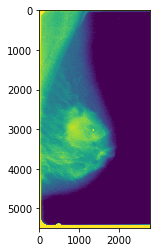

---------------------------------
Diagnosis: MALIGNANT


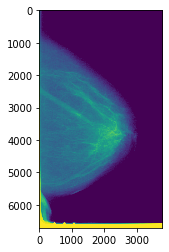

---------------------------------
Diagnosis: MALIGNANT


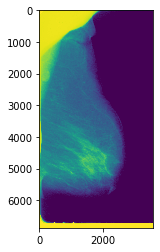

---------------------------------
Diagnosis: BENIGN


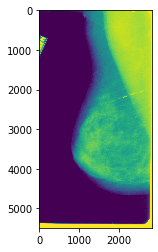

---------------------------------
Diagnosis: BENIGN


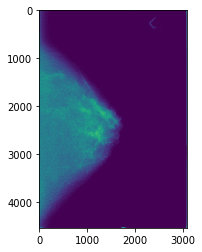

In [4]:
import matplotlib.pyplot as plt
import pydicom as dicom

for i in range(10,20):
    print("---------------------------------")
    print("Diagnosis:", Diagnoses[i])
    ds = dicom.dcmread(File_Paths[i])
    plt.imshow(ds.pixel_array)
    plt.show()

Cool, so now we have the dataset ready to go! Lets transform the images into a list of 2D arrays so that we can feed them to our ML model

In [5]:
PixelArrays = []

for File_Path in File_Paths:
    dimg = dicom.dcmread(File_Path)
    PixelArrays.append(dimg.pixel_array)

print(PixelArrays)

[array([[38508, 38442, 38530, ...,     0,     0,     0],
       [38244, 38596, 37627, ...,     0,     0,     0],
       [39080, 39851, 39080, ...,     0,     0,     0],
       ...,
       [25804, 22612, 20410, ...,     0,     0,     0],
       [35668, 24990, 21819, ...,     0,     0,     0],
       [61780, 40027, 24791, ...,     0,     0,     0]], dtype=uint16), array([[65535, 65535, 65535, ...,     0,     0,     0],
       [65535, 65535, 65535, ...,     0,     0,     0],
       [65535, 65535, 65535, ...,     0,     0,     0],
       ...,
       [65535, 65535, 65535, ..., 17218, 16271, 15764],
       [65535, 65535, 65535, ..., 15919, 17218, 17130],
       [65535, 65535, 65535, ..., 17394, 18142, 17966]], dtype=uint16), array([[37957, 37869, 37297, ..., 65535, 65535, 65535],
       [37319, 37209, 37385, ..., 65535, 65535, 65535],
       [37033, 37209, 37011, ..., 65535, 65535, 65535],
       ...,
       [    0,     0,     0, ..., 65535, 65535, 65535],
       [    0,     0,     0, ..., 6

In [11]:
(MaxX, MaxY) = (0, 0)

for Array in PixelArrays:
    shape = Array.shape
    #print(shape)
    if shape[0] > MaxX:
        MaxX = shape[0]
    if shape[1] > MaxY:
        MaxY = shape[1]
#print()
print(MaxX, MaxY)    

6871 4351


In [21]:
for Array in PixelArrays:
    shape = Array.shape
    pad = [(0, MaxX-shape[0]), (0, MaxY-shape[1])]
    Array = np.pad(Array, pad_width=pad, mode='constant', constant_values=0)
    #print(Array.shape)

In [20]:
print(PixelArrays[0])

[[38508 38442 38530 ...     0     0     0]
 [38244 38596 37627 ...     0     0     0]
 [39080 39851 39080 ...     0     0     0]
 ...
 [25804 22612 20410 ...     0     0     0]
 [35668 24990 21819 ...     0     0     0]
 [61780 40027 24791 ...     0     0     0]]


Now all arrays are padded to make them the same size. We are ready to feed them to the ML model. First lets split that data up into training and testing data:

In [23]:
# number of training samples (80% of Set 1)
n80 = int(len(PixelArrays) * 0.8)

# Split into training (80%) and testing (20%) 
train_diagnoses, test_diagnoses = Diagnoses[:n80], Diagnoses[n80:len(PixelArrays)]
train_images, test_images = PixelArrays[:n80], PixelArrays[n80:] 

print(len(train_diagnoses), len(train_images))
print(len(test_diagnoses), len(test_images))

260 260
66 66


Great, now we just need to build the model and we should be good to go